In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning) 
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import os
from PIL import Image

In [11]:
import os
import matplotlib.pyplot as plt

In [3]:
input_dir = "Dataset" 
output_dir = "preprocessed_data" 
categories = ['training_fake', 'training_real']
new_categories = ['fake', 'real']

In [4]:
os.makedirs(output_dir, exist_ok=True)
for category in new_categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

In [5]:
def preprocess_image(image_path, target_size=(15, 15)):
    try:
        img = Image.open(image_path)
        img = img.resize(target_size, Image.ANTIALIAS)
        img = img.convert('RGB')
        return img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [6]:
def process_and_move_images():
    for category, new_category in zip(categories, new_categories):
        category_path = os.path.join(input_dir, category)
        new_category_path = os.path.join(output_dir, new_category)
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            preprocessed_img = preprocess_image(file_path)
            
            if preprocessed_img:
                new_file_path = os.path.join(new_category_path, filename)
                preprocessed_img.save(new_file_path)

In [7]:
process_and_move_images()
print("Preprocessing and organization completed.")

C:\Users\shiva\AppData\Local\Temp\ipykernel_16588\2784625116.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Preprocessing and organization completed.


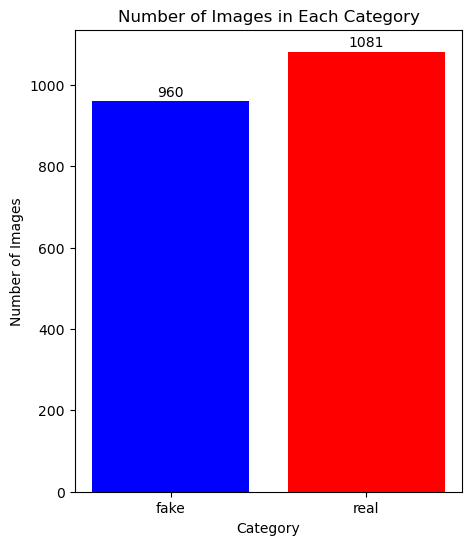

In [16]:
counts = {category: 0 for category in new_categories}

for category in new_categories:
    category_path = os.path.join(output_dir, category)
    counts[category] = len(os.listdir(category_path))

plt.figure(figsize=(5, 6))
bars = plt.bar(counts.keys(), counts.values(), color=['blue', 'red'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')

for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()